Use the environment base(Python 3.9.13)

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data=pd.read_csv('layoffs.csv')


In [8]:
data.shape # Data has 9 columns and 1574 rows

(1574, 9)

In [9]:
data.size #Data has 14166 values in data

14166

View head of dataset

In [10]:
data.head()

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country
0,Veev,SF Bay Area,Real Estate,100.0,0.30,2022-11-11,597.0,Series D,United States
1,GoTo Group,Jakarta,Transportation,1000.0,0.10,2022-11-10,1300.0,Unknown,Indonesia
2,Juul,SF Bay Area,Consumer,400.0,0.30,2022-11-10,1500.0,Unknown,United States
3,InfluxData,SF Bay Area,NaN,65.0,0.27,2022-11-10,119.0,Series D,United States
4,Coinbase,SF Bay Area,Crypto,60.0,NaN,2022-11-10,549.0,IPO,United States


In [11]:
data.isna().sum() # To find missing value from data. Need to clean this mess

company             0
location            0
industry            3
total_laid_off    442
percentage        521
date                0
funds_raised      102
stage               4
country             0
dtype: int64

# Time to clean the dirty data for our data analysis


1. Data.drop: To drop irrelevant data from the analysis/ axis=1 means drop by columns

2. .fillna(1): Fill the NA value with value of 1

3. .astype(): Cast the type of the value. In this case, we cast the value of Na in total_laid_off values with integer

4. And check any null value left with .isna().sum()

REFER THE PANDAS 1.4.4 documentations for details

In [12]:
data= data.drop(['funds_raised','percentage','stage'],axis=1) # Drop unrelated data from analysis using drop method
data.total_laid_off = data.total_laid_off.fillna(1) # Filling up the null value in total_laid_off columns with value of 1
data.total_laid_off = data.total_laid_off.astype(int) # Change the data types of total_laid_off columns into integer
data.industry = data.industry.fillna('Undefine') # Fill null value in industry columns as 'Undefine' 

data.isna().sum() 



company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
dtype: int64

# Analyse the data

Count the values of the country,industry,location columns using .value_counts 

In [13]:
data.country.value_counts().head()

United States     1052
India              101
Canada              69
Brazil              52
United Kingdom      46
Name: country, dtype: int64

In [14]:
data.industry.value_counts().head()

Finance           194
Retail            134
Healthcare        109
Transportation    102
Marketing         100
Name: industry, dtype: int64

In [15]:
data.location.value_counts().head()

SF Bay Area      434
New York City    182
Boston            69
Los Angeles       69
Seattle           53
Name: location, dtype: int64

# Data visualization

Plot a graph with pyplot to find the pattern

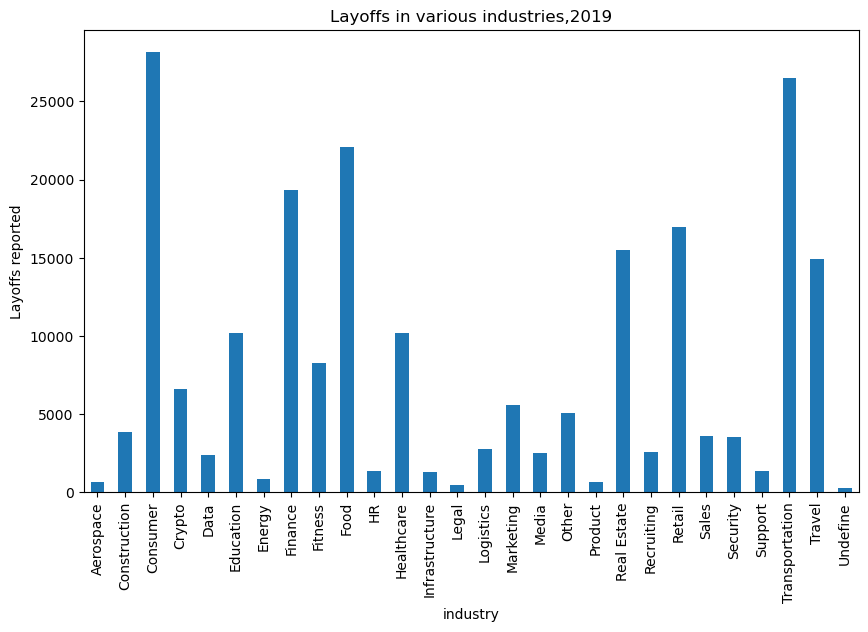

In [16]:
plt.figure(figsize=(10,6))
plt.title("Layoffs in various industries,2019")
plt.ylabel("Layoffs reported")
data_industries = data.groupby('industry').sum()['total_laid_off'].plot(kind= 'bar')

Get data from index column by years (2022,2021,2020)

In [17]:
data = data.set_index('date')
data_2022= data.loc[:'2022']
data_2021 = data.loc[(data.index > '2021-01-01') & (data.index < '2022-01-01')]
data_2020 = data.loc[(data.index > '2020-01-01') & (data.index < '2021-01-01')]


In [18]:
most_laid_off_22= data_2022.sort_values(by = 'total_laid_off', ascending = False)
most_laid_off_22.head() 

#Get the highest values of laids off 

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000,United States
2022-05-25,Getir,Istanbul,Food,4480,Turkey
2022-11-04,Twitter,SF Bay Area,Consumer,3700,United States
2022-03-08,Better.com,New York City,Real Estate,3000,United States
2022-02-08,Peloton,New York City,Fitness,2800,United States


In [19]:
most_laid_off_21 = data_2021.sort_values(by='total_laid_off',ascending= False)
most_laid_off_21.head()

,company,location,industry,total_laid_off,country
date,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434,United States
2021-11-02,Zillow,Seattle,Real Estate,2000,United States
2021-01-21,Instacart,SF Bay Area,Food,1877,United States
2021-01-06,WhiteHat Jr,Mumbai,Education,1800,India
2021-08-05,Bytedance,Shanghai,Consumer,1800,China


In [20]:
most_laid_off_20 = data_2020.sort_values(by='total_laid_off',ascending= False)
most_laid_off_20.head()

,company,location,industry,total_laid_off,country
date,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375,Netherlands
2020-05-06,Uber,SF Bay Area,Transportation,3700,United States
2020-05-18,Uber,SF Bay Area,Transportation,3000,United States
2020-04-13,Groupon,Chicago,Retail,2800,United States
2020-05-05,Airbnb,SF Bay Area,Travel,1900,United States


Plot the bar graph for all years

Text(0, 0.5, 'Layoffs reported')

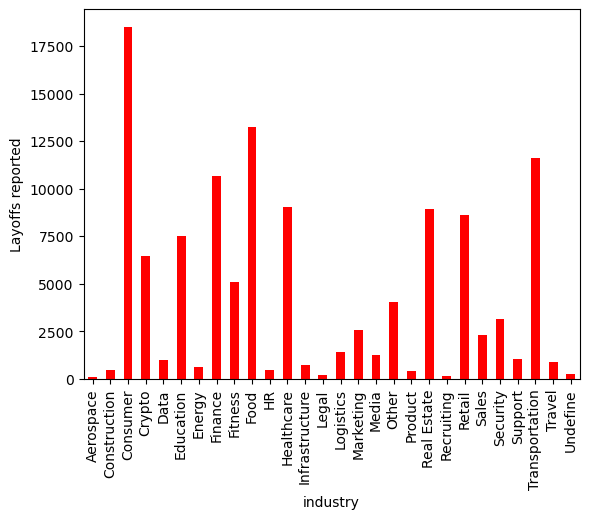

In [21]:
data_2022.groupby('industry')['total_laid_off'].sum().plot(kind= 'bar',color= 'r')
plt.ylabel("Layoffs reported")

<AxesSubplot: xlabel='industry', ylabel='Layoffs reported'>

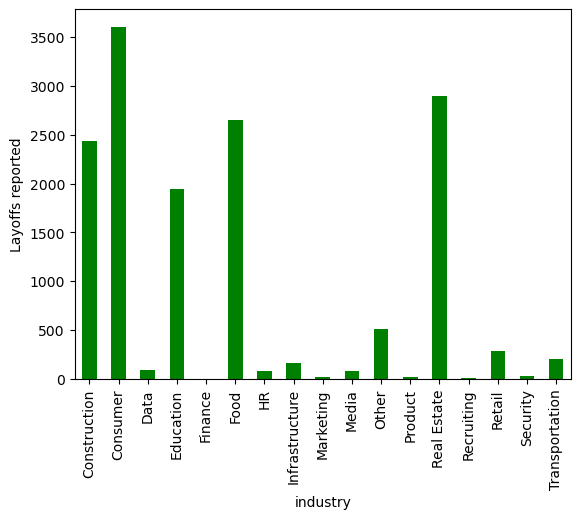

In [22]:
plt.ylabel("Layoffs reported")
data_2021.groupby('industry')['total_laid_off'].sum().plot(kind= 'bar',color= 'g')

<AxesSubplot: xlabel='industry', ylabel='Layoffs reported'>

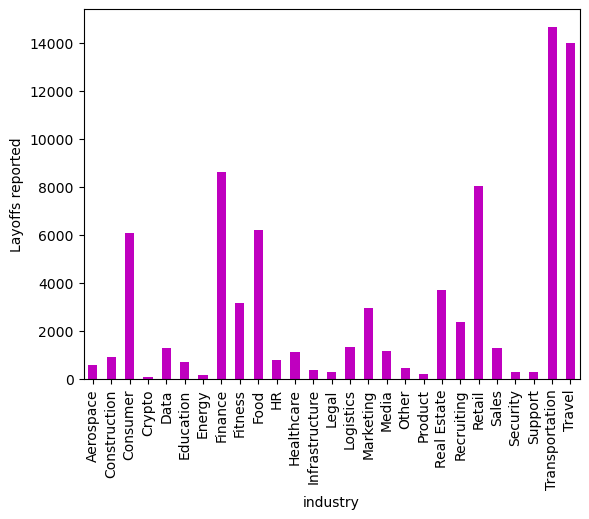

In [23]:
plt.ylabel("Layoffs reported")
data_2020.groupby('industry')['total_laid_off'].sum().plot(kind= 'bar',color= 'm')

Reset to original data and analysis them for the entire year of 2020,2021,2022

In [24]:
data= data.reset_index() #Reset the data to its original data
data['date'] = pd.to_datetime(data['date'])
data_industry= data.groupby([data.industry, data.date.dt.year]).sum()
data_industry


total_laid_off
industry       date                
Aerospace      2020             562
               2022             101
Construction   2020             898
               2021            2434
               2022             491
...                             ...
Transportation 2021             200
               2022           11635
Travel         2020           14002
               2022             893
Undefine       2022             268

[72 rows x 1 columns]

Plot the graph using matplotlib and seaborn library

<AxesSubplot: title={'center': 'Total laids off past 3 year on various industries'}, xlabel='industry', ylabel='total_laid_off'>

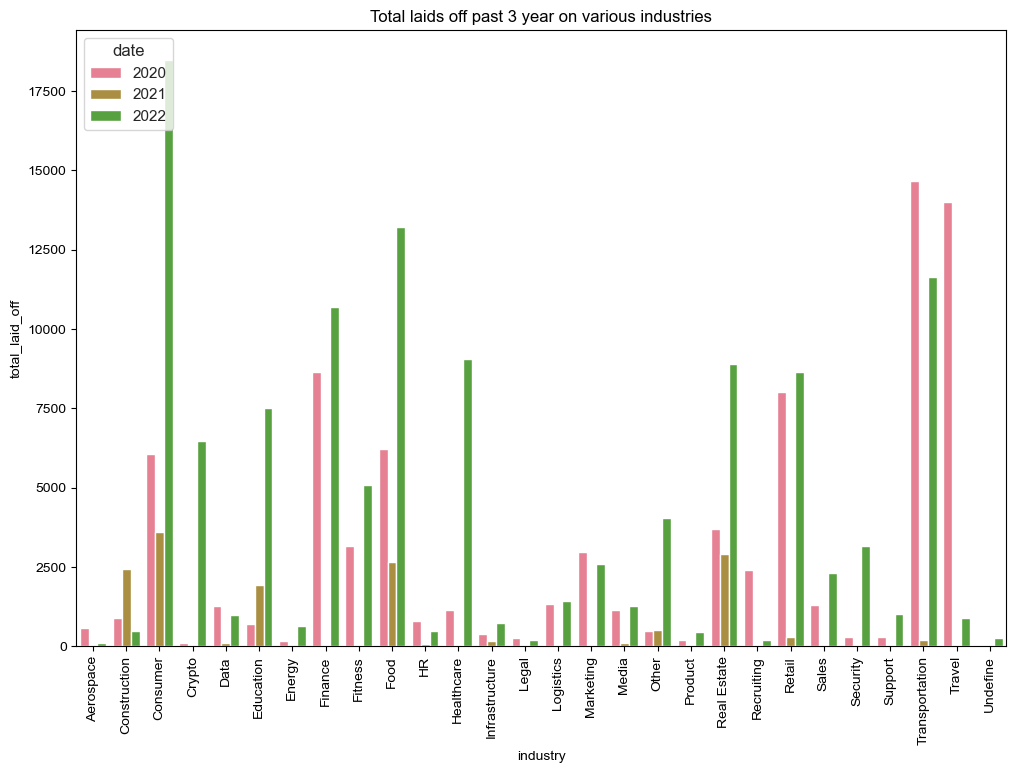

In [25]:
data_industry= data_industry.reset_index()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title("Total laids off past 3 year on various industries")
sns.set(style='white',palette='husl',color_codes=True)

sns.barplot(data=data_industry,x='industry',y='total_laid_off',hue='date')

Conclusion of the analysis: 

On 2022, the most laid off industry is consumer industry as we know this is due to pandemic of Covid-19. However, the most longest affected industry are transportation and travel industries as they affected at least 2 years of period time.

## END OF ANALYSIS